LINEAR REGRESSION 모델 - Life Expectancy 예측

[1단계] 데이터 수집 및 로딩
--------------------------------------------------------------------------------
✓ 데이터 로딩 완료
  - 데이터 크기: 2938행 × 22열
  - 컬럼 수: 22개

컬럼 목록:
   1. Country
   2. Year
   3. Status
   4. Life expectancy 
   5. Adult Mortality
   6. infant deaths
   7. Alcohol
   8. percentage expenditure
   9. Hepatitis B
  10. Measles 
  11.  BMI 
  12. under-five deaths 
  13. Polio
  14. Total expenditure
  15. Diphtheria 
  16.  HIV/AIDS
  17. GDP
  18. Population
  19.  thinness  1-19 years
  20.  thinness 5-9 years
  21. Income composition of resources
  22. Schooling

[2단계] 탐색적 데이터 분석 (EDA)

[2.1] 결측치 및 중복값 통계
--------------------------------------------------------------------------------
전체 결측치 개수: 2,563개
중복된 행 개수: 0개

결측치가 있는 컬럼 (상위 10개):
                            컬럼명  결측치 개수  결측치 비율(%)
                     Population     652      22.19
                    Hepatitis B     553      18.82
                            GDP     448      15.

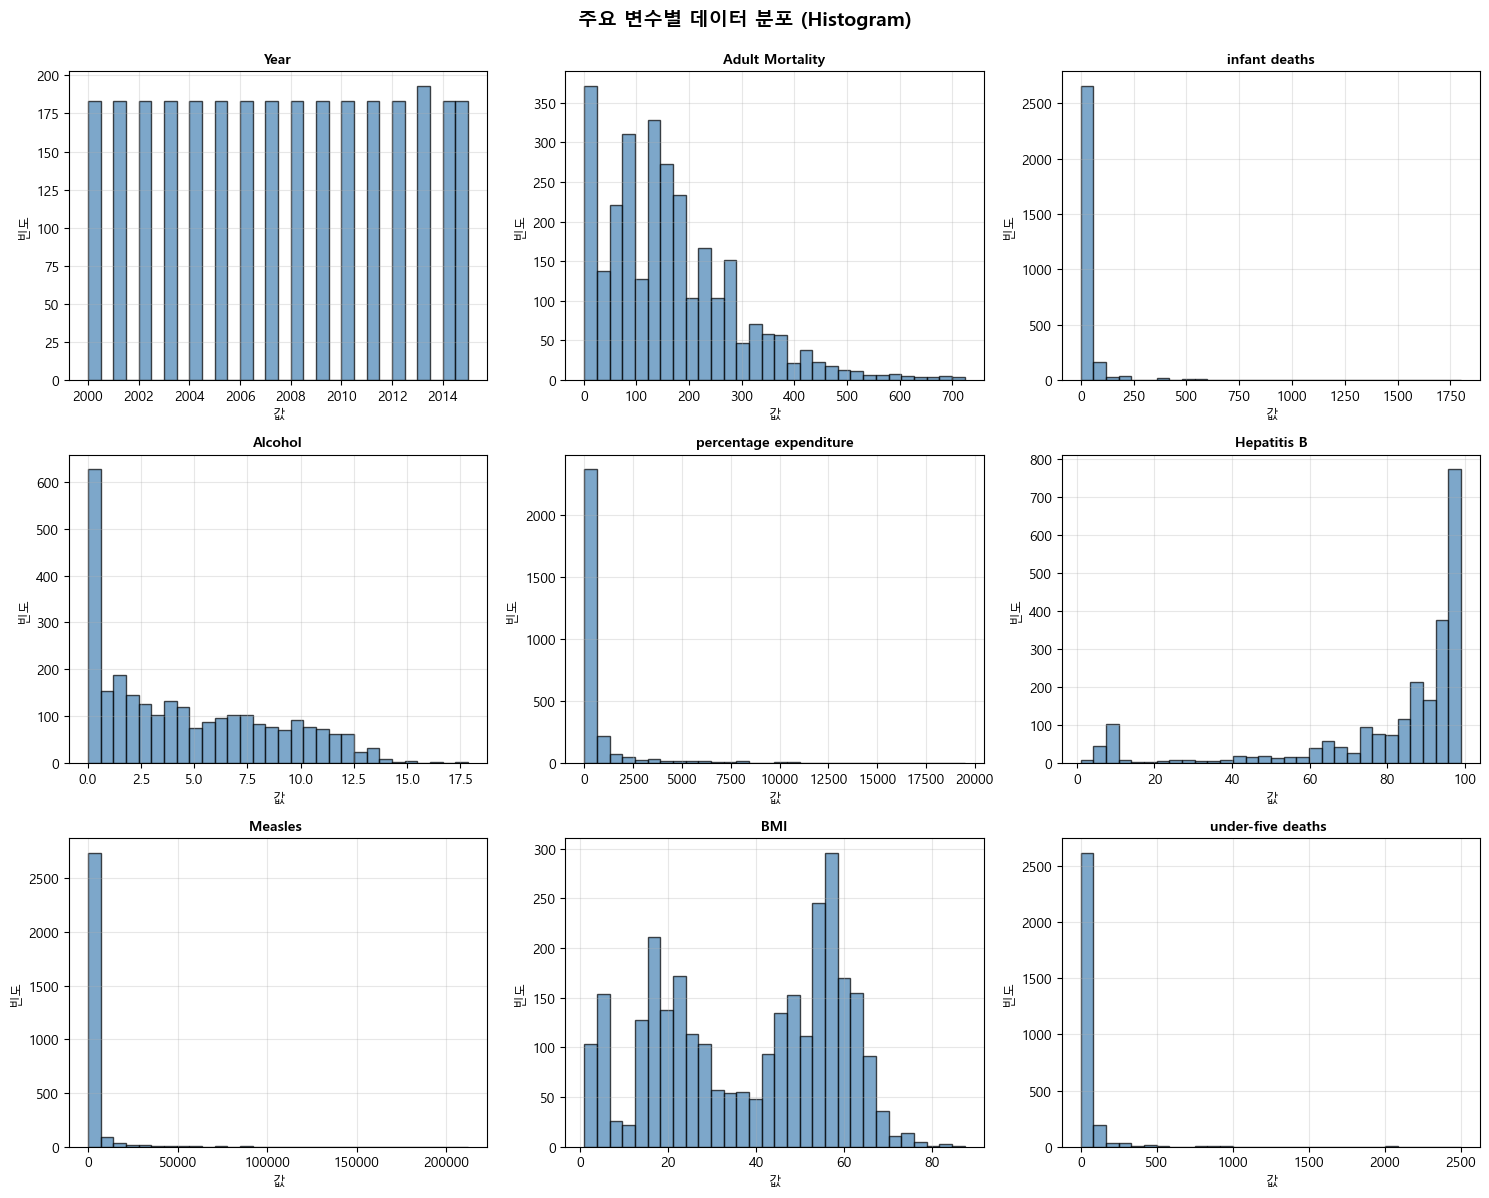


[2.4] 변수 간 상관관계 분석 (Heatmap)
--------------------------------------------------------------------------------
✓ [창 2] 상관관계 히트맵 표시


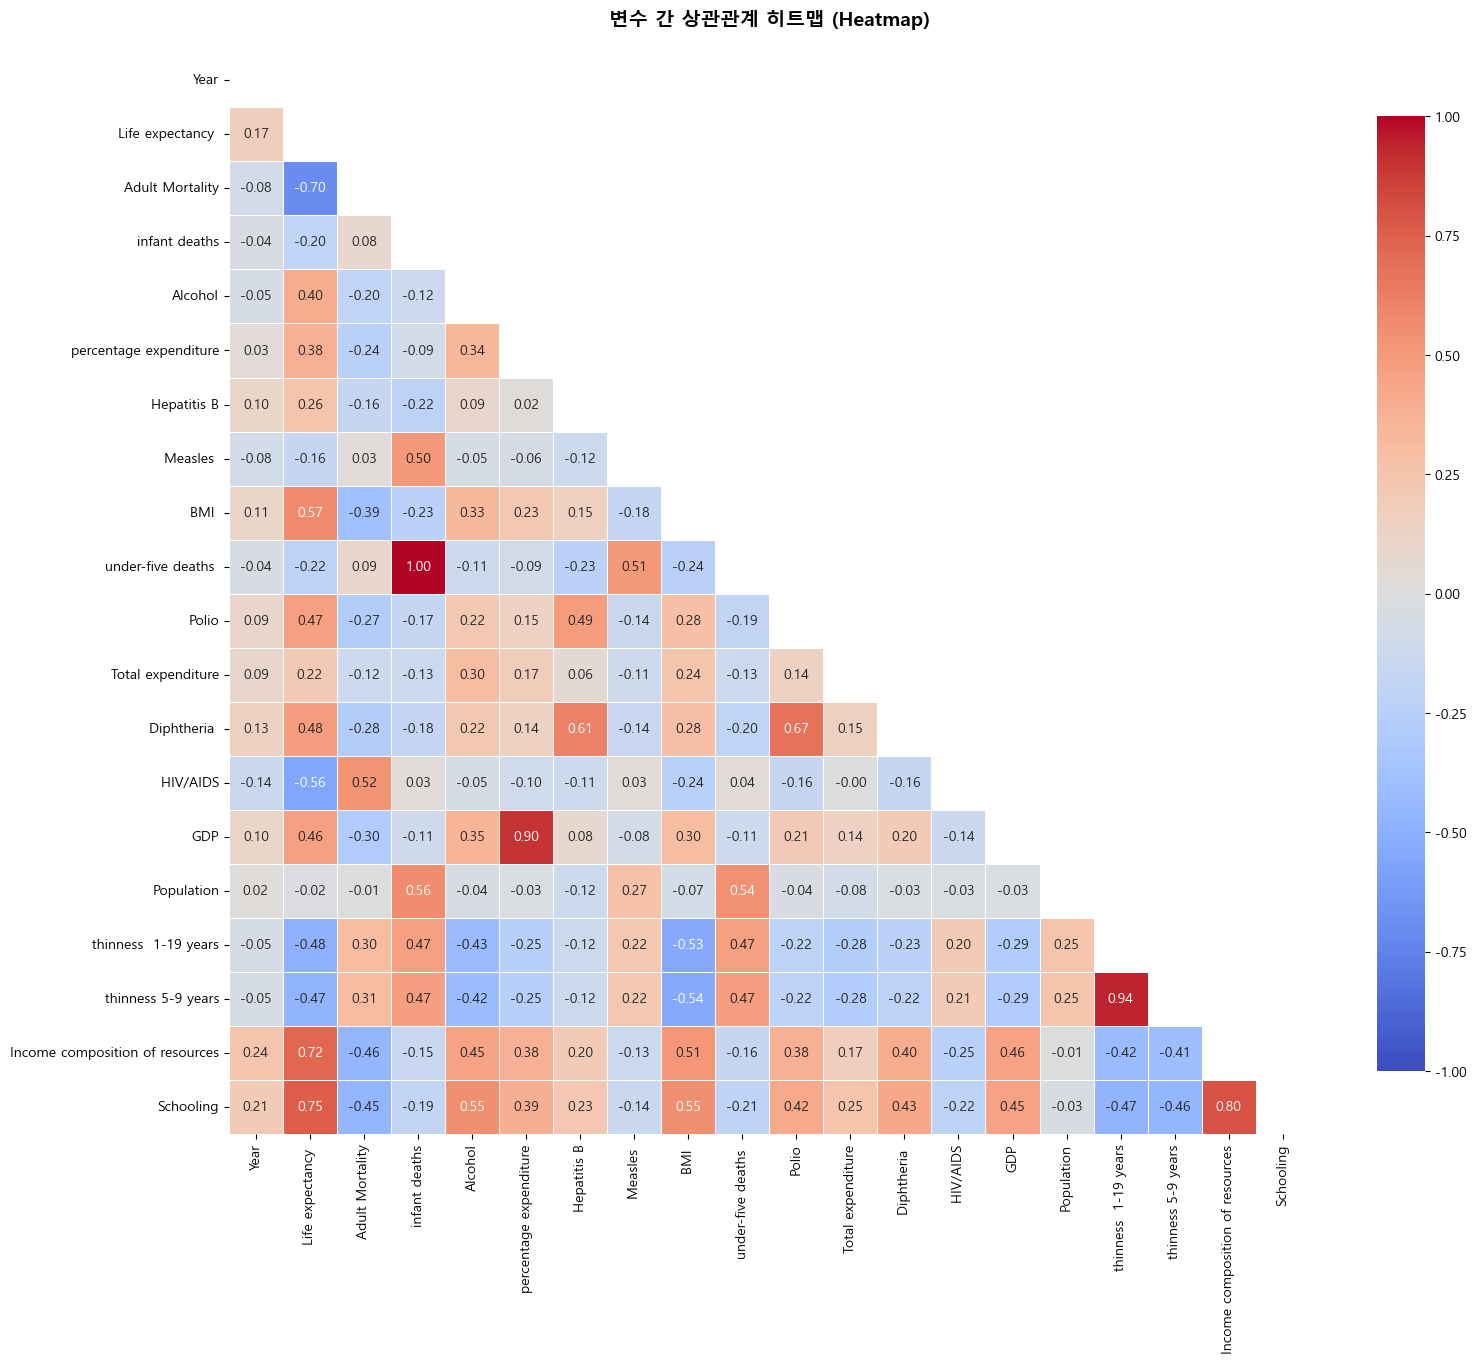


Life Expectancy와 상관관계가 높은 변수 (상위 10개):
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086

[3단계] 데이터 전처리

[3.1] 결측치 처리
--------------------------------------------------------------------------------
✓ 숫자형 변수 결측치를 중앙값으로 대체
  - 전처리 후 결측치: 0개

[3.2] 범주형 변수 인코딩
--------------------------------------------------------------------------------
✓ 범주형 변수 인코딩 완료
  - Country: 193개 국가 → 숫자 변환
  - Status: 2개 상태 → 숫자 변환

[3.3] 특성(X)과 타겟(y) 분리
--------------------------------------------------------------------------------
✓ 데이터 분리 완료
  - 특성(X): (2938, 21)
  - 타겟(y): (2938,)

[3.4] 학습/테스트 데이터 분할
---------------------

NameError: name 'test_rmse' is not defined

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

print("=" * 80)
print("LINEAR REGRESSION 모델 - Life Expectancy 예측")
print("=" * 80)

# ============================================================================
# 1. 데이터 수집 및 로딩
# ============================================================================
print("\n[1단계] 데이터 수집 및 로딩")
print("-" * 80)

# CSV 파일에서 데이터 로드
# - 기대수명(Life Expectancy)과 관련된 여러 국가의 건강, 경제, 사회 지표 데이터
df = pd.read_csv('./dataset/LifeExpectancyData.csv')

print(f"✓ 데이터 로딩 완료")
print(f"  - 데이터 크기: {df.shape[0]}행 × {df.shape[1]}열")
print(f"  - 컬럼 수: {len(df.columns)}개")
print(f"\n컬럼 목록:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

# ============================================================================
# 2. 탐색적 데이터 분석 (EDA - Exploratory Data Analysis)
# ============================================================================
# EDA 목적: 데이터의 특성을 파악하고 문제점을 발견하기 위함
# - 결측치 확인
# - 데이터 분포 확인
# - 변수 간 상관관계 파악
print("\n" + "=" * 80)
print("[2단계] 탐색적 데이터 분석 (EDA)")
print("=" * 80)

# 2.1 결측치 및 중복값 통계
print("\n[2.1] 결측치 및 중복값 통계")
print("-" * 80)

# 결측치 확인
# - 결측치가 많으면 데이터 품질이 낮음
# - 결측치 처리 방법: 삭제, 평균/중앙값 대체, 예측 모델 사용 등
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    '컬럼명': missing_counts.index,
    '결측치 개수': missing_counts.values,
    '결측치 비율(%)': missing_percent.values
})
missing_df = missing_df[missing_df['결측치 개수'] > 0].sort_values('결측치 개수', ascending=False)

print(f"전체 결측치 개수: {df.isnull().sum().sum():,}개")
print(f"중복된 행 개수: {df.duplicated().sum()}개")
print(f"\n결측치가 있는 컬럼 (상위 10개):")
if len(missing_df) > 0:
    print(missing_df.head(10).to_string(index=False))
else:
    print("  결측치 없음")

# 2.2 기초 통계량
print("\n[2.2] 기초 통계량")
print("-" * 80)
# describe(): 평균, 표준편차, 최솟값, 최댓값, 사분위수 등을 보여줌
# - 이상치(outlier) 확인 가능
# - 변수의 범위(scale) 파악 → 스케일링 필요성 판단
print(df.describe().round(2))

# 2.3 주요 변수별 데이터 분포 (Histogram)
print("\n[2.3] 주요 변수별 데이터 분포 시각화")
print("-" * 80)

# 숫자형 컬럼만 선택
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Life expectancy 제외하고 주요 변수 선택 (최대 9개)
# 이유: Life expectancy는 타겟 변수이므로 독립변수 분포만 확인
plot_cols = [col for col in numeric_cols if col != 'Life expectancy '][:9]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()  # 2D 배열을 1D로 변환하여 접근 쉽게

for idx, col in enumerate(plot_cols):
    # 히스토그램으로 데이터 분포 확인
    # - 정규분포인지, 편향(skewed)되어 있는지 확인
    # - 이상치 존재 여부 파악
    axes[idx].hist(df[col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('값', fontsize=9)
    axes[idx].set_ylabel('빈도', fontsize=9)
    axes[idx].grid(True, alpha=0.3)

# 빈 subplot 제거 (9개보다 변수가 적을 경우)
for idx in range(len(plot_cols), 9):
    fig.delaxes(axes[idx])

plt.suptitle('주요 변수별 데이터 분포 (Histogram)', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
print("✓ [창 1] 주요 변수별 히스토그램 표시")
plt.show()

# 2.4 상관관계 분석 (Heatmap)
print("\n[2.4] 변수 간 상관관계 분석 (Heatmap)")
print("-" * 80)

# 숫자형 데이터만 선택 (문자열은 상관계수 계산 불가)
df_numeric = df.select_dtypes(include=[np.number])

# 상관계수 계산
# - 피어슨 상관계수(Pearson correlation): -1 ~ +1
# - 0에 가까우면 관계 없음, ±1에 가까우면 강한 관계
correlation_matrix = df_numeric.corr()

# Heatmap 그리기
plt.figure(figsize=(16, 14))
# mask: 상삼각 행렬만 숨김 (대칭 행렬이므로 중복 정보 제거)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            annot=True,  # 숫자 표시
            fmt='.2f',   # 소수점 2자리
            cmap='coolwarm',  # 빨강(양), 파랑(음)
            center=0,    # 0을 중심으로
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            mask=mask,
            vmin=-1, vmax=1)
plt.title('변수 간 상관관계 히트맵 (Heatmap)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
print("✓ [창 2] 상관관계 히트맵 표시")
plt.show()

# Life expectancy와 상관관계가 높은 변수 출력
# 목적: 어떤 변수가 기대수명에 영향을 많이 미치는지 파악
target_corr = correlation_matrix['Life expectancy '].drop('Life expectancy ').sort_values(ascending=False)
print(f"\nLife Expectancy와 상관관계가 높은 변수 (상위 10개):")
print(target_corr.head(10).to_string())

# ⚠️ 문제점: 다중공선성 체크는 했지만 제거하지 않음!
# 예: thinness 5-9 years와 thinness 1-19 years는 상관계수 0.94
# → 둘 중 하나는 제거해야 모델이 안정적임

# ============================================================================
# 3. 데이터 전처리
# ============================================================================
print("\n" + "=" * 80)
print("[3단계] 데이터 전처리")
print("=" * 80)

# 3.1 결측치 처리
print("\n[3.1] 결측치 처리")
print("-" * 80)
df_cleaned = df.copy()

# 숫자형 변수의 결측치를 중앙값(median)으로 대체
# 중앙값 사용 이유:
# - 평균(mean)은 이상치에 민감함
# - 중앙값은 이상치에 강건(robust)함
# 예: [1, 2, 3, 100] → 평균=26.5, 중앙값=2.5 (중앙값이 더 대표적)
for col in df_cleaned.select_dtypes(include=[np.number]).columns:
    median_val = df_cleaned[col].median()
    df_cleaned[col].fillna(median_val, inplace=True)

print(f"✓ 숫자형 변수 결측치를 중앙값으로 대체")
print(f"  - 전처리 후 결측치: {df_cleaned.isnull().sum().sum()}개")

# 3.2 범주형 변수 인코딩
print("\n[3.2] 범주형 변수 인코딩")
print("-" * 80)

# LabelEncoder: 문자열을 숫자로 변환
# 예: ['Korea', 'USA', 'Japan'] → [0, 1, 2]
# 
# 주의: LabelEncoder는 순서가 없는 범주형 변수에는 부적합!
# - 'Korea'=0, 'USA'=1이라고 해서 USA가 Korea보다 크다는 의미 아님
# - 올바른 방법: One-Hot Encoding 사용
#   예: Korea=[1,0,0], USA=[0,1,0], Japan=[0,0,1]
# 
# ⚠️ 이 코드의 문제점: LabelEncoder 사용으로 모델이 잘못된 순서 관계 학습 가능
le_country = LabelEncoder()
le_status = LabelEncoder()
df_cleaned['Country'] = le_country.fit_transform(df_cleaned['Country'])
df_cleaned['Status'] = le_status.fit_transform(df_cleaned['Status'])

print(f"✓ 범주형 변수 인코딩 완료")
print(f"  - Country: {len(le_country.classes_)}개 국가 → 숫자 변환")
print(f"  - Status: {len(le_status.classes_)}개 상태 → 숫자 변환")

# 3.3 특성(X)과 타겟(y) 분리
print("\n[3.3] 특성(X)과 타겟(y) 분리")
print("-" * 80)

# X: 독립변수 (입력) - 기대수명을 예측하기 위한 변수들
# y: 종속변수 (출력) - 예측하고자 하는 기대수명
X = df_cleaned.drop(['Life expectancy '], axis=1)
y = df_cleaned['Life expectancy ']

print(f"✓ 데이터 분리 완료")
print(f"  - 특성(X): {X.shape}")
print(f"  - 타겟(y): {y.shape}")

# 3.4 학습/테스트 데이터 분할
print("\n[3.4] 학습/테스트 데이터 분할")
print("-" * 80)

# 데이터를 학습용(80%)과 테스트용(20%)으로 분할
# 목적:
# - 학습 데이터: 모델을 학습시키는 데 사용
# - 테스트 데이터: 모델의 일반화 성능 평가 (미래 데이터 성능 추정)
# 
# random_state=42: 재현 가능하도록 시드 고정
# - 같은 코드 실행 시 항상 같은 분할 결과
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✓ 데이터 분할 완료 (Train: 80%, Test: 20%)")
print(f"  - 학습 데이터: {X_train.shape}")
print(f"  - 테스트 데이터: {X_test.shape}")

# 3.5 데이터 스케일링
print("\n[3.5] 데이터 스케일링 (StandardScaler)")
print("-" * 80)

# StandardScaler: 평균=0, 표준편차=1로 정규화
# 
# 왜 필요한가?
# 예: GDP(수만~수십만)와 성인사망률(0~1)은 단위가 다름
# - GDP가 크기 때문에 모델이 GDP에만 편향될 수 있음
# - 스케일링하면 모든 변수가 같은 중요도로 취급됨
# 
# 변환 공식: (x - 평균) / 표준편차
# 예: [10, 20, 30] → 평균=20, 표준편차=8.16
#     → [−1.22, 0, 1.22]
# 
# ⚠️ 주의: fit_transform은 학습 데이터에만!
# - 테스트 데이터는 transform만 (학습 데이터의 평균/표준편차 사용)
# - 이유: 테스트 데이터 정보가 학습에 유출되면 안 됨 (Data Leakage)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 학습: 통계량 계산 + 변환
X_test_scaled = scaler.transform(X_test)        # 테스트: 변환만

# DataFrame으로 변환 (컬럼명 유지 - 가독성 위해)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"✓ StandardScaler를 사용한 정규화 완료")
print(f"  - 평균: 0, 표준편차: 1로 스케일링")

# ============================================================================
# 4. 모델링 - Linear Regression
# ============================================================================
print("\n" + "=" * 80)
print("[4단계] 모델링 - Linear Regression")
print("=" * 80)

print("\n[4.1] 모델 학습")
print("-" * 80)

# Linear Regression: 선형 회귀 모델
# 공식: y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ
# 
# 예: Life Expectancy = β₀ + β₁(Schooling) + β₂(GDP) + ...
# 
# 동작 방식:
# - 최소제곱법(Least Squares)으로 오차를 최소화하는 계수(β) 찾기
# - 목표: Σ(실제값 - 예측값)² 최소화
# 
# ⚠️ 현재 코드의 문제점:
# 1. 다중공선성 높은 변수들(상관 0.94)을 그대로 사용
#    → 회귀 계수가 불안정해지고 해석이 어려움
# 2. 범주형 변수를 LabelEncoding으로 처리
#    → 잘못된 순서 관계 학습 가능
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("✓ Linear Regression 모델 학습 완료!")

# ============================================================================
# 5. 예측 및 성능 평가
# ============================================================================
print("\n" + "=" * 80)
print("[5단계] 예측 및 성능 평가")
print("=" * 80)

# 5.1 예측
# 학습 데이터와 테스트 데이터 모두 예측
# - 학습 데이터 예측: 과적합(overfitting) 확인용
# - 테스트 데이터 예측: 실제 성능 평가용
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 5.2 성능 지표 계산
# 
# MSE (Mean Squared Error): 평균 제곱 오차
# - 공식: Σ(실제 - 예측)² / n
# - 작을수록 좋음
# - 단점: 이상치에 민감, 단위가 제곱
# 
# RMSE (Root Mean Squared Error): MSE의 제곱근
# - 공식: √MSE
# - 원래 단위로 해석 가능 (예: 3.5년)
# 
# MAE (Mean Absolute Error): 평균 절대 오차
# - 공식: Σ|실제 - 예측| / n
# - 이상치에 덜 민감
# 
# R² Score (결정계수): 모델의 설명력
# - 범위: 0 ~ 1 (1에 가까울수록 좋음)
# - 의미: 모델이 데이터 변동의 몇 %를 설명하는가
# - 예: R²=0.85 → 85% 설명 가능
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_rmse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n[5.1] 모델 성능 평가")
print("=" * 80)
print(f"{'평가 지표':<20} {'학습 데이터':<20} {'테스트 데이터':<20}")
print("-" * 80)
print(f"{'MSE':<20} {train_mse:<20.4f} {test_mse:<20.4f}")
print(f"{'RMSE':<20} {train_rmse:<20.4f} {test_rmse:<20.4f}")
print(f"{'MAE':<20} {train_mae:<20.4f} {test_mae:<20.4f}")
print(f"{'R² Score':<20} {train_r2:<20.4f} {test_r2:<20.4f}")

# 과적합(Overfitting) 확인:
# - Train R² >> Test R²이면 과적합
# - 예: Train=0.95, Test=0.70 → 과적합!
# - 해결: 정규화(Ridge, Lasso), 변수 선택, 더 많은 데이터

# 5.3 회귀 계수 분석
print("\n[5.2] 회귀 계수 분석 (상위 10개)")
print("=" * 80)

# 회귀 계수(coefficient): 각 변수가 타겟에 미치는 영향
# 
# 해석:
# - 양수: 변수 증가 → 기대수명 증가
# - 음수: 변수 증가 → 기대수명 감소
# - 절댓값 클수록: 영향력 큼
# 
# 예: Schooling 계수 = +2.5
# → 교육 연수가 1년 증가하면 기대수명이 2.5년 증가
# 
# ⚠️ 주의: 스케일링 후 계수이므로 원래 단위가 아님!
coefficients = pd.DataFrame({
    '특성': X.columns,
    '계수': model.coef_
}).sort_values('계수', key=abs, ascending=False)  # 절댓값 기준 정렬

print(coefficients.head(10).to_string(index=False))

# ============================================================================
# 6. 시각화
# ============================================================================
print("\n" + "=" * 80)
print("[6단계] 예측 결과 시각화")
print("=" * 80)

# 6.1 실제값 vs 예측값 & 잔차 플롯
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 좌측: 실제값 vs 예측값
# - 완벽한 예측이면 모든 점이 빨간 선(y=x) 위에 위치
# - 선에서 멀수록 예측 오차 큼
axes[0].scatter(y_test, y_test_pred, alpha=0.6, edgecolors='k', linewidth=0.5, s=30)
axes[0].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', lw=2, label='완벽한 예측선')
axes[0].set_xlabel('실제 Life Expectancy (년)', fontsize=11)
axes[0].set_ylabel('예측 Life Expectancy (년)', fontsize=11)
axes[0].set_title(f'Linear Regression 예측 결과\nR² = {test_r2:.4f}, RMSE = {test_rmse:.4f}', 
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 우측: 잔차 플롯 (Residual Plot)
# 잔차 = 실제값 - 예측값
# 
# 좋은 모델의 잔차 패턴:
# - 0을 중심으로 무작위로 분포 (랜덤)
# - 패턴이 없어야 함
# 
# 문제 있는 패턴:
# - U자 형태: 비선형 관계 존재 → 다항 회귀 필요
# - 퍼짐이 점점 커짐: 등분산성 위배 → 로그 변환 필요
# - 특정 영역에 몰림: 이상치 존재
residuals = y_test - y_test_pred
axes[1].scatter(y_test_pred, residuals, alpha=0.6, edgecolors='k', linewidth=0.5, s=30)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('예측 Life Expectancy (년)', fontsize=11)
axes[1].set_ylabel('잔차 (실제값 - 예측값)', fontsize=11)
axes[1].set_title('잔차 플롯 (Residual Plot)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
print("✓ [창 3] 예측 결과 및 잔차 플롯 표시")
plt.show()

# 6.2 회귀 계수 시각화
plt.figure(figsize=(10, 8))
top_coef = coefficients.head(15)
# 양수=파랑, 음수=빨강으로 구분
colors = ['red' if x < 0 else 'blue' for x in top_coef['계수']]
plt.barh(top_coef['특성'], top_coef['계수'], color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('회귀 계수 값', fontsize=11)
plt.ylabel('특성', fontsize=11)
plt.title('상위 15개 특성의 회귀 계수 (Linear Regression)', fontsize=12, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
print("✓ [창 4] 회귀 계수 시각화 표시")
plt.show()

# 6.3 실제 데이터와 예측 데이터 분포 비교
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 학습 데이터 분포
# - 파랑(실제)과 빨강(예측)이 비슷하면 모델이 데이터 분포를 잘 학습
axes[0].hist(y_train, bins=30, alpha=0.6, color='blue', edgecolor='black', label='실제값 (Train)')
axes[0].hist(y_train_pred, bins=30, alpha=0.6, color='red', edgecolor='black', label='예측값 (Train)')
axes[0].set_xlabel('Life Expectancy (년)', fontsize=11)
axes[0].set_ylabel('빈도', fontsize=11)
axes[0].set_title('학습 데이터 분포 비교', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 테스트 데이터 분포
axes[1].hist(y_test, bins=30, alpha=0.6, color='blue', edgecolor='black', label='실제값 (Test)')
axes[1].hist(y_test_pred, bins=30, alpha=0.6, color='red', edgecolor='black', label='예측값 (Test)')
axes[1].set_xlabel('Life Expectancy (년)', fontsize=11)
axes[1].set_ylabel('빈도', fontsize=11)
axes[1].set_title('테스트 데이터 분포 비교', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
print("✓ [창 5] 실제 데이터와 예측 데이터 분포 비교")
plt.show()

# ============================================================================
# 7. 결과 저장
# ============================================================================
print("\n" + "=" * 80)
print("[7단계] 결과 저장")
print("=" * 80)

# 성능 지표를 CSV로 저장 (나중에 다른 모델과 비교용)
results = {
    '모델': 'Linear Regression',
    'Test_MSE': test_mse,
    'Test_RMSE': test_rmse,
    'Test_MAE': test_mae,
    'Test_R2': test_r2,
    'Train_MSE': train_mse,
    'Train_RMSE': train_rmse,
    'Train_MAE': train_mae,
    'Train_R2': train_r2
}

results_df = pd.DataFrame([results])
results_df.to_csv('linear_regression_metrics.csv', index=False)
print("✓ 성능 지표 저장: linear_regression_metrics.csv")

# 회귀 계수 저장 (어떤 변수가 중요한지 분석용)
coefficients.to_csv('linear_regression_coefficients.csv', index=False)
print("✓ 회귀 계수 저장: linear_regression_coefficients.csv")

# ============================================================================
# 최종 요약
# ============================================================================
print("\n" + "=" * 80)
print("LINEAR REGRESSION 분석 완료!")
print("=" * 80)
print(f"\n📊 최종 성능 요약:")
print(f"  - R² Score: {test_r2:.4f}")
print(f"  - RMSE: {test_rmse:.4f}")
print(f"  - MAE: {test_mae:.4f}")
print(f"\n✓ 모든 분석이 완료되었습니다.")
print("=" * 80)